
## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 7: Graphs and Networks, Probabilty and Markov Processes
## Due December 12, 2021 by 11:59 PM
### <span style="color: red">Mayank Kumar </span>

Copyright &copy; 2021, University of Washington

<hr>

**Instructions**: Please use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="color: red'">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

### 0. Warmup (Do not turn in)

- Make sure you download, read, and run the notebook for lectures 8 and 9. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory overview of the incredibly rich and expansive subject of Graph Theory.
- Most of the section on basic graph theory is from chapter one of

> Bollobas, [Modern Graph Theory](https://www.springer.com/gp/book/9780387984889).

- The spanning tree algorithm by Prim is from 

> Gibbons, [Algorithmic Graph Theory](https://www.amazon.com/Algorithmic-Graph-Theory-Alan-Gibbons/dp/0521288819). 

- Graphs as matrices is covered in 

> Nica, [A Brief Introduction to Spectral Graph Theory](https://www.amazon.com/Introduction-Spectral-Theory-Textbooks-Mathematics/dp/3037191880/ref=sr_1_2?crid=3ETRQ8B0PW4EJ&keywords=spectral+graph+theory&qid=1573687537&s=books&sprefix=spectral+graph%2Cstripbooks%2C195&sr=1-2).

The consensus algorithm is described in [these notes](http://www.eeci-institute.eu/pdf/M010/Eeci-sp09_L4_graphtheory.pdf) by Richard Murray.

You will also need `networkx` which can be obtained [here](https://networkx.github.io/). If you are on Google CoLab, see [here](https://stackoverflow.com/questions/51342408/how-do-i-install-python-packages-in-googles-colab) for how to install packages. 

- Most of the section on probability is from chapter of the really, really, really good book:

> Feller, [An Introduction to Probability Theory and Its Applications, Vol 1](https://www.amazon.com/Introduction-Probability-Theory-Applications-Vol/dp/0471257087), 3rd Edition, Wiley, 1968. 

- The material on Markov Chains can be found in numerous textbooks. A good online source is Chapter 11 of 

> Grinstead, [Introduction to Probability](http://www.dartmouth.edu/~chance/teaching_aids/books_articles/probability_book/book.html).

In [1]:
import networkx as nx
import math
import scipy
import scipy.integrate as spi
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import itertools
import random
%matplotlib inline

## 1. Creating a Graph

Let $V = \{ 1, ..., 20 \}$ and say that $uv \in E$ if and only if $u$ and $v$ have a common factor other than $1$. Use `networkx` to define this graph and render it. Make sure to label the nodes.


Below graph considers the pairs (2,2), (3,3) and so on to plot the relation. These pairs will have itself
as second factor and they are more than 1.

Also, prime numbers will have only 1 and itself as factor. So, they will be isolated in the bunch in the 
Graph. But they will have the self loop as explained above.



<Figure size 1440x1440 with 0 Axes>

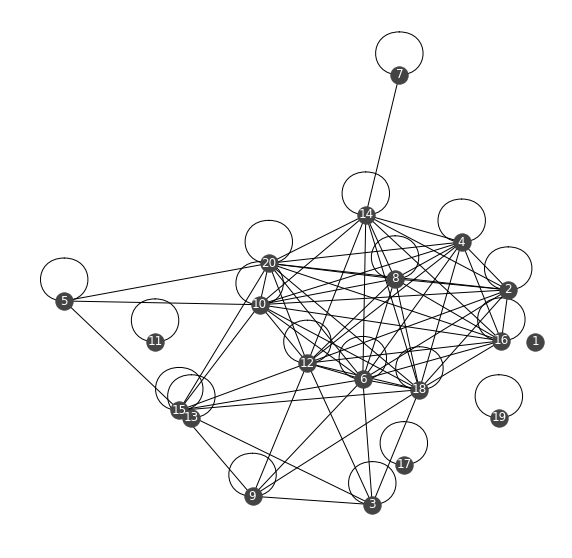

In [2]:
G = nx.Graph()
## list of numbers
num_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

#adding all the numbers as node
G.add_nodes_from(num_list)

def commonfactors(n,m):
    """
    function which returns list of commonfactors if two numbers are passed. 
    """
    array=[]
    for i in range(1, min(n, m)+1): 
        if n%i == m%i ==0: 
            array.append(i)
    return array

def edges(num_list):
    """
    function to return list of edges for each elements in the input list. 
    """
    temp = []
    for i in range(1,len(num_list)+1):
        for j in range(1,len(num_list)+1):
            if len(commonfactors(i,j)) > 1:
                temp.append((i,j))
    return temp

# print(edges(num_list))

G.add_edges_from(edges(num_list))
plt.figure(figsize = (20,20))
basic_graph,ax = plt.subplots(1,1,figsize = (10,10))
nx.draw(G,
        ax=ax, 
        pos=nx.kamada_kawai_layout(G),
        with_labels=True, 
        node_color='#444444',
        font_color="white")

print("""
Below graph considers the pairs (2,2), (3,3) and so on to plot the relation. These pairs will have itself
as second factor and they are more than 1.

Also, prime numbers will have only 1 and itself as factor. So, they will be isolated in the bunch in the 
Graph. But they will have the self loop as explained above.
""")

## 2. Bipartite Graphs

a) What is the greatest number of edges a connected bipartite graph with $5$ nodes can have? Draw all five node graphs with this number of edges (up to isomorphism).

b) What is the least number of edges a connected bipartite graph with $5$ nodes can have? Draw all five node graphs with this number of edges (up to isomorphism).

### Answer to question 2
With 5 vertices, we can have following combinations possible. 
1. (3,2), (2,3)
2. (1,4), (4,1)

Here, first number represents the number of nodes in set 1 and second number represents number of nodes in set 2.

As graphs must be connected, 

**a. Maximum number of edges: 6**, it will be possible in case (2,3) and (3,2) if nodes in set 1 are mapped to every node in set 2. 

**b. Minimum number of edges: 4** in case of (3,2) and (1,4) it will have bijective relation.


Text(0.5, 1.0, '(4,1) Minimum edges')

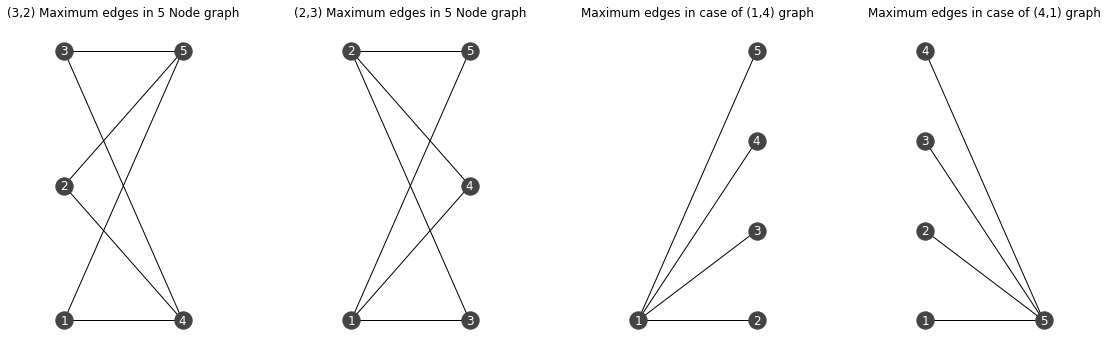

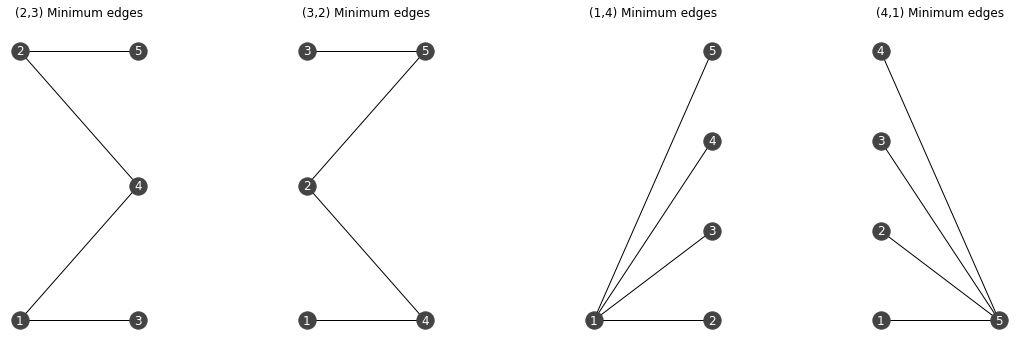

In [3]:
G = nx.Graph()
H = nx.Graph()
I = nx.Graph()
J = nx.Graph()

G.add_nodes_from([1,2,3,4,5])
H.add_nodes_from([1,2,3,4,5])
I.add_nodes_from([1,2,3,4,5])
J.add_nodes_from([1,2,3,4,5])

G.add_edges_from([(1,5),(1,4),(2,4),(2,5),(3,4),(3,5)]) #(3,2)
H.add_edges_from([(1,2),(1,3),(1,4),(1,5)])   #(1,4)
I.add_edges_from([(1,5),(2,5),(3,5),(4,5)])   #(4,1)
J.add_edges_from([(1,3),(1,4),(1,5),(2,3),(2,4),(2,5)]) #(2,3)

### maximum number of edges
bipartite_graph,ax = plt.subplots(1,4, figsize = (18,6))
nx.draw(G, ax=ax[0], pos=nx.bipartite_layout(G,[1,2,3]),with_labels=True, 
        node_color='#444444',font_color="white")
ax[0].set_title('(3,2) Maximum edges in 5 Node graph')
plt.subplots_adjust(wspace=1)
nx.draw(J, ax=ax[1], pos=nx.bipartite_layout(J,[1,2]),with_labels=True, 
        node_color='#444444',font_color="white")
ax[1].set_title('(2,3) Maximum edges in 5 Node graph')

plt.subplots_adjust(wspace=1)
nx.draw(H, ax=ax[2], pos=nx.bipartite_layout(H,[1]),with_labels=True, 
        node_color='#444444',font_color="white")
ax[2].set_title('Maximum edges in case of (1,4) graph')

plt.subplots_adjust(wspace=1)
nx.draw(I, ax=ax[3], pos=nx.bipartite_layout(I,[1,2,3,4]),with_labels=True, 
        node_color='#444444',font_color="white")
ax[3].set_title('Maximum edges in case of (4,1) graph')

## Minimum number of edges
K = nx.Graph()
L = nx.Graph()
M = nx.Graph()

K.add_edges_from([(1,4),(3,1),(2,5), (2,4)])
L.add_edges_from([(1,2),(1,3),(1,4),(1,5)])
M.add_edges_from([(1,4),(2,4),(2,5),(3,5)])

bipartite_graph,ax = plt.subplots(1,4, figsize = (18,6))
nx.draw(K, ax=ax[0], pos=nx.bipartite_layout(K,[1,2]),with_labels=True, 
        node_color='#444444',font_color="white")
ax[0].set_title('(2,3) Minimum edges')

plt.subplots_adjust(wspace=1)
nx.draw(M, ax=ax[1], pos=nx.bipartite_layout(M,[1,2,3]),with_labels=True, 
        node_color='#444444',font_color="white")
ax[1].set_title('(3,2) Minimum edges')

plt.subplots_adjust(wspace=1)
nx.draw(L, ax=ax[2], pos=nx.bipartite_layout(L,[1]),with_labels=True, node_color='#444444',font_color="white")
ax[2].set_title('(1,4) Minimum edges')

plt.subplots_adjust(wspace=1)
nx.draw(I, ax=ax[3], pos=nx.bipartite_layout(I,[1,2,3,4]),with_labels=True, 
        node_color='#444444',font_color="white")
ax[3].set_title('(4,1) Minimum edges')

## 3. The Laplacian

Consider the random graphs returned by `nx.fast_gnp_random_graph(n,p)` where $n$ is the number of nodes and $p$ is the probability of an edge between any two nodes. 

Make a list of graphs with $10$ nodes with $p$ ranging from 0 to 1 by steps of 0.01. For each graph, compute the eigenvalues of the Laplacian. Then plot all the eigenvalues for against $p$. For example, above $p=0.01$ you would have a point for each of the 10 real eigenvalues of the graph you made with $p=0.01$. 

What trends do you see in the eigenvalues?

Based on experimentation, what are the eigenvalues of the Laplacian of a completely connected graph?

In [4]:
## Getting all the graphs/laplacian and eigen values in a list 
alist = []
prob = []
laplacian = []    
eig = []
for i in range(0,100):
    alist.append(nx.fast_gnp_random_graph(10,(i+1)/100.0))
    laplacian.append(nx.laplacian_matrix(alist[i]).todense())
    eig.append(np.linalg.eigvals(laplacian[i]))
    prob.append((i+1)/100)


fig = plt.figure(figsize = (100,200))
for i in range(0,100):
    fig.add_subplot(20,5,i+1)
    plt.plot(np.real(eig[i]), 'o',color = 'r',label = prob[i])
    plt.plot(np.real(eig[i]))
    plt.title(prob[(i)])
    plt.xlabel("eigen value number")
    plt.ylabel("value")

plt.legend()

print("""
Maximum Eigen value of a graph increases with increase in probability of connection. 

for fully connected graph, Max value of eigen value is equal to N. N is number of nodes in the graph.
""")


Maximum Eigen value of a graph increases with increase in probability of connection. 

for fully connected graph, Max value of eigen value is equal to N. N is number of nodes in the graph.



## 4. Dice

Suppose two dice are tossed, but that the dice are weighted so that 1 comes up as twice as likely as any other number for both dice. 

a) What is the probability of getting a sum of seven?

b) What is the probability of getting a sum of seven given that the first die comes up 1?

c) What is the probability neither die coming up 1?

d) What is the PDF of the random variable $X$ defined to the the sum of the two dice?

In [5]:
alist = []
for i in range (1,7):
    for j in range(1,7):
        if (i+j == 7): 
            alist.append((i,j))

print("Pairs for which we can get 7:",alist)

Pairs for which we can get 7: [(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)]


if there is probability of getting 1 is twice as large as other numbers, then, 
$$ 2x + x + x + x + x + x = 1$$
$$ 7x = 1$$
$$x = \frac{1}{7}$$

$\therefore$ probability of getting 1 is $\frac{2}{7}$ and probability of getting other numbers is $\frac{1}{7}$.

$\therefore$ **for question 4(a):** \
Answer = $$2\left(\frac{2}{7} \times \frac{1}{7}\right) + 4 \left(\frac{1}{7} \times \frac{1}{7}\right)$$
$$= \frac{4}{49}  + \frac{4}{49}$$
$$= \frac{8}{49}$$

**Question 4(b)**
in case first die is already 1, we have only one possibility where sum will be 7 i.e., (1,6)

Probability  = $$\frac{2}{7} \times \frac{1}{7} $$
$$= \frac{2}{49}$$

**Question 4(c)**

In [6]:
alist = []
for i in range(1,7):
    for j in range(1,7):
        if (i != 1 and j != 1):
            alist.append((i,j))
        
total = len(alist)
print("Total pairs in which 1 is not part of: ",total)

Total pairs in which 1 is not part of:  25


Probability of such cases will be:  $$total \times \frac{1}{7} \times \frac{1}{7}$$\
$$=25 \times \frac{1}{7} \times \frac{1}{7}$$ \
$$= \frac{25}{49}$$ 


**Question 4(d)**

Table of outcomes: 

|| 1 | 2 | 3 | 4 | 5 | 6 |
| :-| :- | -: | :-: |:-: |:-: |:-: |
|**1**|(1,1)|(1,2)|(1,3)|(1,4)|(1,5)|(1,6)
|**2**|(2,1)|(2,2)|(2,3)|(2,4)|(2,5)|(2,6)
|**3**|(3,1)|(3,2)|(3,3)|(3,4)|(3,5)|(3,6)
|**4**|(4,1)|(4,2)|(4,3)|(4,4)|(4,5)|(4,6)
|**5**|(5,1)|(5,2)|(5,3)|(5,4)|(5,5)|(5,6)
|**6**|(6,1)|(6,2)|(6,3)|(6,4)|(6,5)|(6,6)

Table of Summation: 

|| 1 | 2 | 3 | 4 | 5 | 6 |
| :-| :- | -: | :-: |:-: |:-: |:-: |
|**1**|2|3|4|5|6|7
|**2**|3|4|5|6|7|8
|**3**|4|5|6|7|8|9
|**4**|5|6|7|8|9|10
|**5**|6|7|8|9|10|11|12
|**6**|7|8|9|10|11|12

Table of probability for each event: 

|| 1 | 2 | 3 | 4 | 5 | 6 |
| ---| ---| --- | --- |--- |--- |--- |
|1|$\frac{4}{49}$ |$\frac{2}{49}$|$\frac{2}{49}$|$\frac{2}{49}$|$\frac{2}{49}$|$\frac{2}{49}$ |
|2|$\frac{2}{49}$ |$\frac{1}{49}$|$\frac{1}{49}$|$\frac{1}{49}$|$\frac{1}{49}$|$\frac{1}{49}$|
|3|$\frac{2}{49}$ |$\frac{1}{49}$|$\frac{1}{49}$|$\frac{1}{49}$|$\frac{1}{49}$|$\frac{1}{49}$|
|4|$\frac{2}{49}$ |$\frac{1}{49}$|$\frac{1}{49}$|$\frac{1}{49}$|$\frac{1}{49}$|$\frac{1}{49}$|
|5|$\frac{2}{49}$ |$\frac{1}{49}$|$\frac{1}{49}$|$\frac{1}{49}$|$\frac{1}{49}$|$\frac{1}{49}$|
|6|$\frac{2}{49}$ |$\frac{1}{49}$|$\frac{1}{49}$|$\frac{1}{49}$|$\frac{1}{49}$|$\frac{1}{49}$|



NOW, we will build table of sum vs probability

|sum|2|3|4|5|6|7|8|9|10|11|12|
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|**probability**|$\frac{4}{49}$|$\frac{4}{49}$|$\frac{5}{49}$|$\frac{6}{49}$|$\frac{7}{49}$|$\frac{8}{49}$|$\frac{5}{49}$|$\frac{4}{49}$|$\frac{3}{49}$|$\frac{2}{49}$|$\frac{1}{49}$|

Text(0, 0.5, 'Probaility')

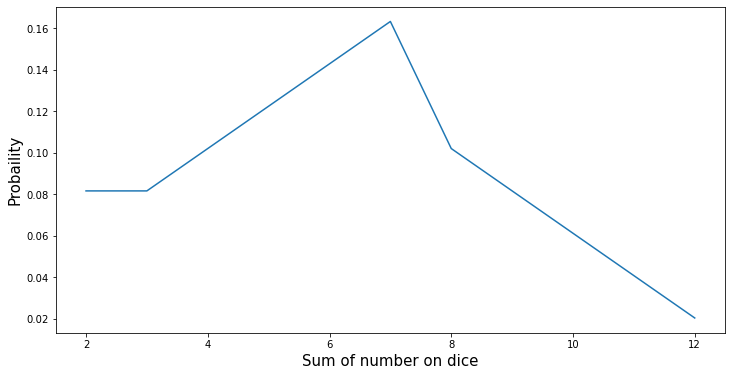

In [7]:
asum = [2,3,4,5,6,7,8,9,10,11,12]
prob = [4/49, 4/49, 5/49, 6/49, 7/49, 8/49, 5/49, 4/49, 3/49, 2/49, 1/49]

fig = plt.figure(figsize = (12,6))
plt.plot(asum,prob)
plt.xlabel("Sum of number on dice", size = 15)
plt.ylabel("Probaility", size = 15)

## 5. Functions of a Random Variable

Suppose $X$ is distributed uniformly in the interval $[0,1]$. That is, $f_X(x) = 1$ if $x \in [0,1]$ and $f_X(x) = 0$ otherwise. 

a) What is the CDF of $X$?

b) Let $Y = X^2$. Find and plot $F_Y$ and $f_Y$. 

**Question 5(a)**

$$\int_{-\infty}^{\infty} f_x(x) dx $$\
for $0 \leq x \leq 1 $, if we choose a x in the interval: 
$$= \int_{0}^{x} f_x(x) dx$$\
$$= \int_{0}^{x} 1 dx$$\
$$= \left|x\right|_0^x $$
$$ = x-0 $$
$$ = x $$

considering above for any interval in $[0,x]$, CDF of the function will be $f_x(x) = x $

$$
CDF\;of\;f_x(x) = \left \{
\begin{array}{ll}
x & \mathrm{if}\;0 \leq x \leq 1 \\
0 & \mathrm{otherwise}. 
\end{array}
\right .
$$


**Question 5(b)**

$$\text{CDF} (F_Y(x)) =  \int_{-\infty}^{\infty} x^2 dx $$\
For  $ 0 \leq x \leq 1 $\, if we choose a x in the interval: 
$$\text{CDF} (F_Y(x)) =  \int_{0}^{x} x^2 dx $$\
$$ =  \left|\frac{x^3}{3}\right|_{0}^{x} $$\
$$ =  \frac{x^3}{3}  $$

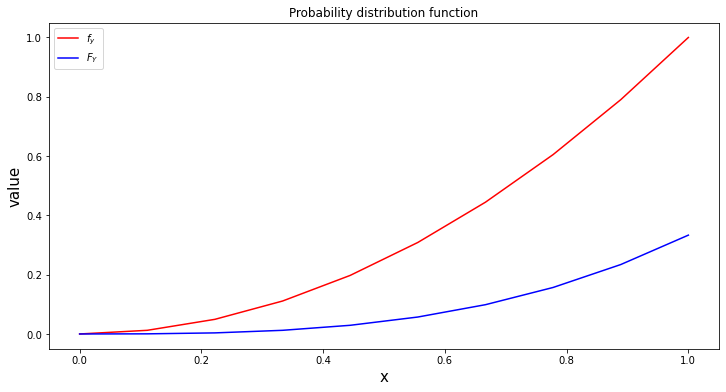

In [8]:
x = np.linspace(0,1,10)
y = x**2
Y = (x**3)/3

fig = plt.figure(figsize = (12,6))
plt.plot(x,y, color = 'red', label = '$f_y$' )
plt.plot(x,Y, color = 'b', label = '$F_Y$' )
plt.title('Probability distribution function')
plt.xlabel('x', size = 15)
plt.ylabel('value', size = 15)
plt.legend()

## 6. Markov Process Properties

Consider the following three Markov Processes.
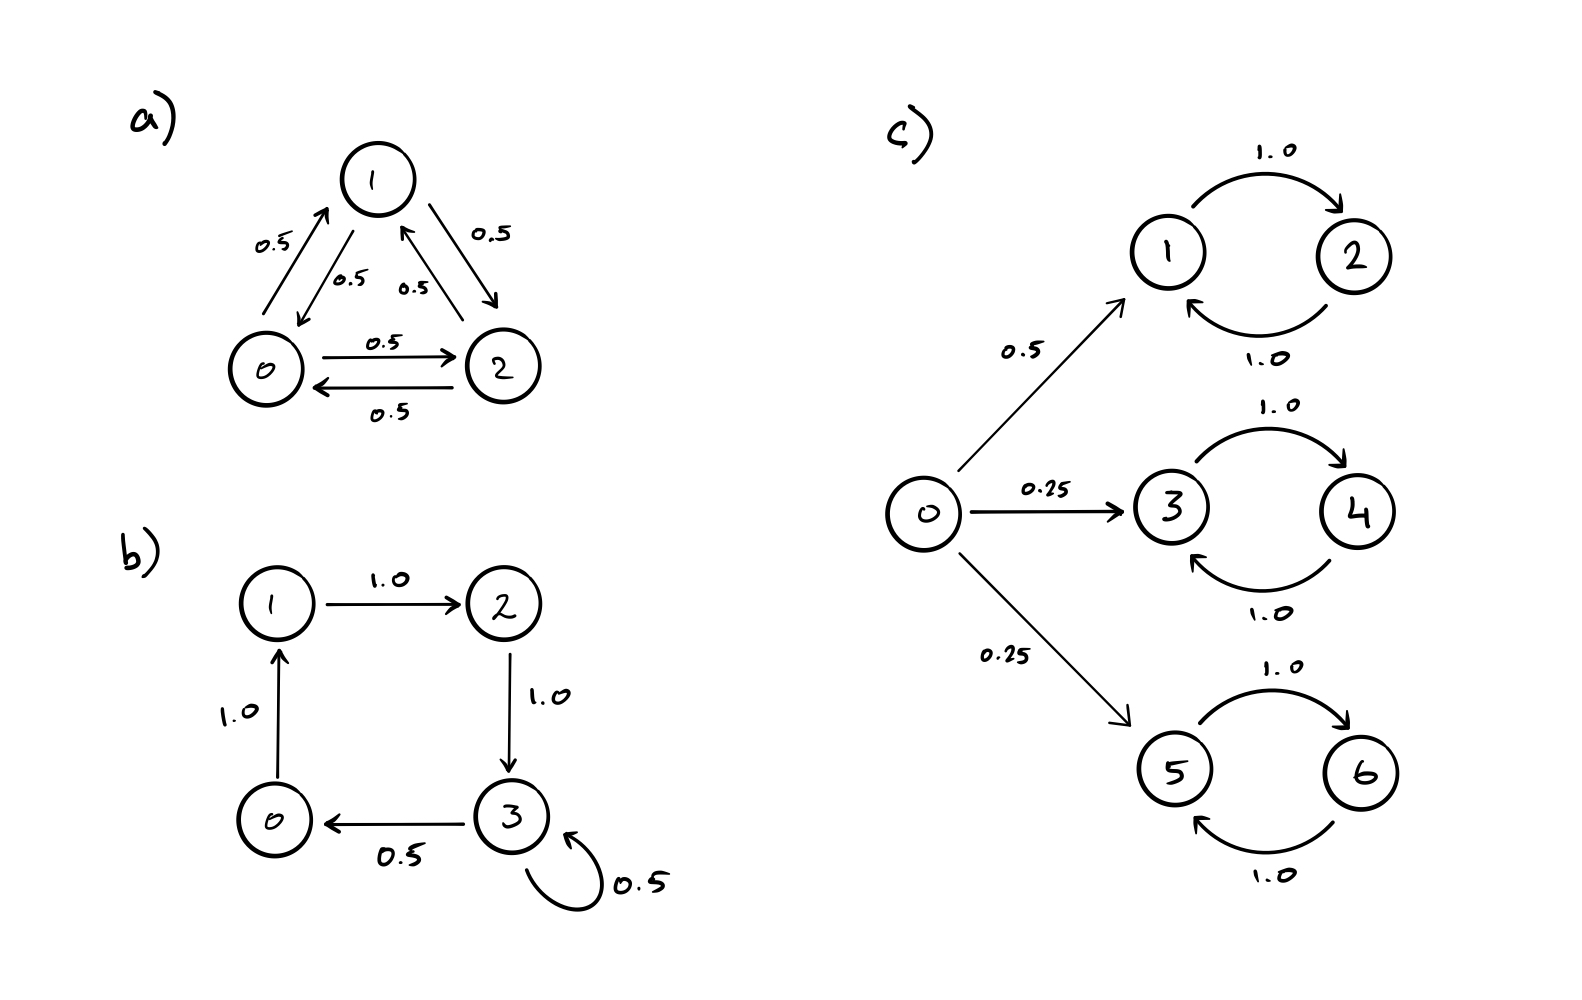

For each process,

i) Find the period of each state.

ii) Identify transient states.

iii) Identify absorbing states and absorbing subsets of states.

iv) Identify ergodic states.

**Process a)**

(i) Period: All states are Aperiodic as they don't have definite probability of returning back to same state after defined number of steps. 

(ii) Transient states: None, all states are recurrent. 

(iii) Absorbing States: None

(iv) Ergodic States: All states 

**Process b)**

(i) Period: All the states are Aperiodic as their exist a self loop at 3. 

(ii) Transient states: None, All states are reccurent.

(iii) Absorbing States: None

(iv) Ergodic States: All the states. 

**Process c)**

(i) Period: State 0 - aperiodic, State 1,2,3,4,5,6 - period 2

(ii) Transient states: State 0

(iii) Absorbing States: None, subsets - (state 1, state 2), (state 3, state 4), (state 5, state 6)

(iv) Ergodic States: None

## 7. Stationary Distributions

For each Markov Process in Problem 6:

i) Find the update matrix $Q$.

ii) Simulate the dynamics $p_{k+1} = p_k Q$ starting at the distribution in which $p_0(0) = 1$. Make a plot of the dynamics for each system. To do this, plot a 2D grid where grid point $(k,i)$ is a gray-scale square corresponding to the probability that the process is in state $i$ at time $k$ (the Gambler's Ruin example in the notes does this).

**Question 7(i)**

**Process (a)**
$$
Q = \begin{pmatrix}
0 & 0.5 & 0.5 \\
0.5 & 0 & 0.5 \\
0.5 & 0.5 & 0
\end{pmatrix} 
$$

**Process (b)**
$$
Q = \begin{pmatrix}
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0\\
0 & 0 & 0 & 1\\
0.5 & 0 & 0 & 0.5\\
\end{pmatrix} .
$$

**Process (c)**
$$
Q = \begin{pmatrix}
0 & 0.5 & 0 & 0.25 & 0 & 0.25 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 0 & 1 & 0\\
\end{pmatrix} .
$$

Text(0.5, 1.0, 'State vs Time: Process C')

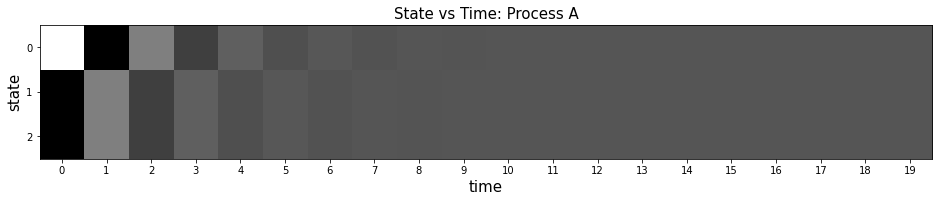

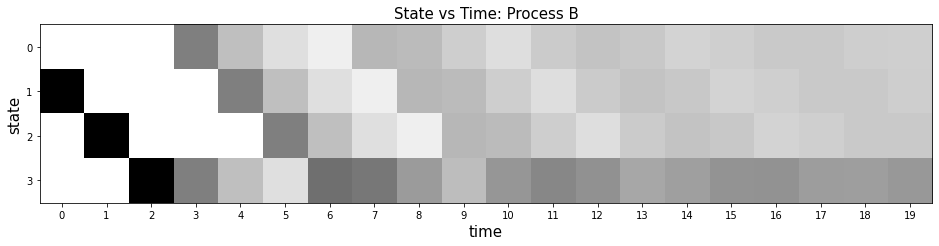

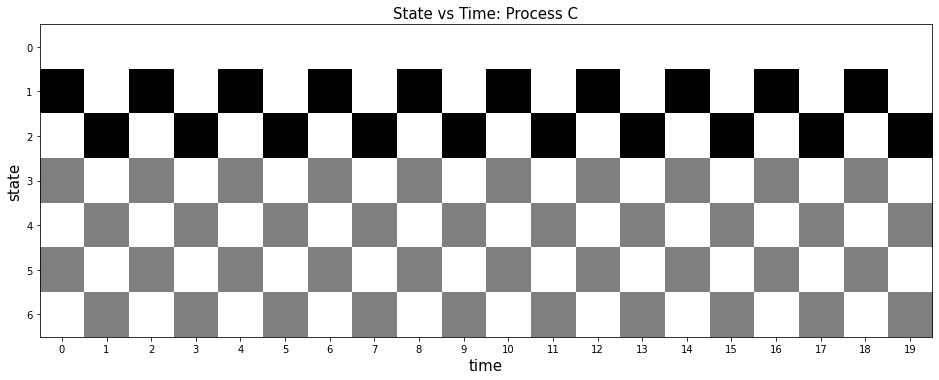

In [9]:
### Question 7(ii)
### Defining function to simulate dynamics of the system
def dynamics(n, Q):
    """
    n = number of iterations to be done. 
    Q = Quality Matrix
    """
    p = np.zeros(Q.shape[0])
    alist = []
    p[0] = 1
    for i in range(n):
        p = p*Q
        p = np.squeeze(np.asarray(p))
        alist.append(p)
    
    return alist


def plotD(m,Q):
    """
    m = number of iterations to be done.
    Q: Quality matrix 
    """
    out = dynamics(m,Q)
    out = np.matrix(out).transpose()
    fig,ax = plt.subplots(1,1, figsize = (16,8))
    ax.imshow(out, cmap = 'gray_r')
    ax.set_xlabel('time', size = 15)
    ax.set_ylabel('state', size = 15)
    plt.locator_params(axis='y', nbins=Q.shape[0])
    plt.locator_params(axis='x', nbins=m)

        
## quality matrix of Process A
QA = np.matrix([[0,0.5,0.5],[0.5,0,0.5],[0.5,0.5,0]])

## quality matrix of Process B
QB = np.matrix([[0,1,0,0],[0,0,1,0],[0,0,0,1],[0.5,0,0,0.5]], dtype = float)

## quality matrix of Process C
QC = np.matrix([[0,0.5,0,0.25,0,0.25,0],
                [0,0,1,0,0,0,0],
                [0,1,0,0,0,0,0],
                [0,0,0,0,1,0,0],
                [0,0,0,1,0,0,0],
                [0,0,0,0,0,0,1],
                [0,0,0,0,0,1,0]], dtype = float)

##########################    
plotD(20, QA)
plt.title("State vs Time: Process A", size = 15)
plotD(20, QB)
plt.title("State vs Time: Process B", size = 15)
plotD(20, QC)
plt.title("State vs Time: Process C", size = 15)